[*********************100%***********************]  1 of 1 completed


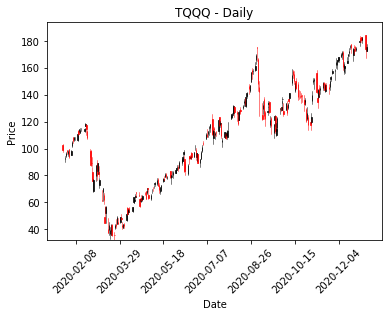

In [1]:
#import relevant libraries
import yfinance as yf
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import datetime as datetime
import numpy as np
from mpl_finance import candlestick_ohlc

yf.pdr_override()

smasUsed=[10,30,50]

start =dt.datetime(2020,1,1)- dt.timedelta(days=max(smasUsed)) 
now = dt.datetime.now() 
stock = input("Enter the stock symbol : ") 

while stock != "quit":

  prices = pdr.get_data_yahoo(stock, start, now) 

  fig, ax1 = plt.subplots() 

  #Calculate moving averages

  for x in smasUsed: 
    sma=x
    prices['SMA_'+str(sma)] = prices.iloc[:,4].rolling(window=sma).mean()

  #calculate Bollinger Bands
  BBperiod=15 #choose moving avera
  stdev=2
  prices['SMA'+str(BBperiod)] = prices.iloc[:,4].rolling(window=BBperiod).mean() 
  prices['STDEV']=prices.iloc[:,4].rolling(window=BBperiod).std() 
  prices['LowerBand']=prices['SMA'+str(BBperiod)]-(stdev*prices['STDEV'])
  prices['UpperBand']=prices['SMA'+str(BBperiod)]+(stdev*prices['STDEV']) 
  prices["Date"]=mdates.date2num(prices.index) #creates a date column stored in number format (for OHCL bars)

  
 
  #Calculate 10.4.4 stochastic
  Period=10
  K=4 
  D=4
  prices["RolHigh"] = prices["High"].rolling(window=Period).max() #Finds high of period
  prices["RolLow"] = prices["Low"].rolling(window=Period).min() #finds low of period
  prices["stok"] = ((prices["Adj Close"]-prices["RolLow"])/(prices["RolHigh"]-prices["RolLow"]))*100 #Finds 10.1 stoch
  prices["K"] = prices["stok"].rolling(window=K).mean() #Finds 10.4 stoch
  prices["D"] = prices["K"].rolling(window=D).mean() #Finds 10.4.4 stoch
  prices["GD"]=prices["High"] #Create GD column to store green dots
  ohlc = [] #Create OHLC array which will store price data for the candlestick chart

  #Delete extra dates
  prices=prices.iloc[max(smasUsed):]
  for i in prices.index: 
    append_me = prices["Date"][i], prices["Open"][i], prices["High"][i], prices["Low"][i], prices["Adj Close"][i], prices["Volume"][i]
    ohlc.append(append_me)

  #plot candlesticks
  candlestick_ohlc(ax1, ohlc, width=.5, colorup='k', colordown='r', alpha=0.75)
  ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) #change x axis back to datestamps
  ax1.xaxis.set_major_locator(mticker.MaxNLocator(8)) #add more x axis labels
  plt.tick_params(axis='x', rotation=45) #rotate dates for readability
  plt.xlabel('Date') #set x axis label
  plt.ylabel('Price') #set y axis label
  plt.title(stock+" - Daily") #set title
  plt.ylim(prices["Low"].min(), prices["High"].max()*1.05) #add margins

  plt.show()
  stock = input("Enter the stock symbol : ") #Asks for new stock
